In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image 
%matplotlib inline

# Tarea 6
### Ecuaciones de Derivadas Parciales, Método de Crank-Nicolson y la ecuación de Reacción-Difusión


#### Métodos Númericos para la Ciencia y la Ingeniería

#### Victor Faraggi

Esta tarea se centra en el estudio del comportamiento de un material ferromágnetico. En este cada pedazo microscópico del material se comporta como un pequeño imán.

Así, se describe la dinámica de los microimanes por:

$$
\frac{dm}{dt} = \mu (m-m^3)
$$

Donde $m$ es la magnetización adimensionalizada y $\mu$ es una constante positiva asociada al material.

En primer lugar, se busca mostrar que según la dinámica anterior $m=0$ es un equilibrio inestable y $m=\pm1$ es un equilibrio estable.

Para esto se recuerda el criterio de ambos equilibrios:

1. Un equilibrio inestable se tiene cuando la energia potencial está en un máximo local. Esto se tiene cuando la segunda derivada es superior a $0$.
2. Un equilibrio estable se tiene cuando la energia potencial está en un mínimo local. Esto se tiene cuando la segunda derivada es inferior a $0$.

Así, se calcula la segunda derivada de ecuación que describe la dinámica de los microimanes:

$$
\frac{d^2m}{dt^2} = \mu(1-3m^2)
$$

Ahora, evaluando $m=0$:

$$
\frac{d^2m}{dt^2} = \mu \cdot 1 > 0, \quad \textrm{Por definición: $\mu$ > 0}
$$

Luego,  evaluando $m= \pm 1$:

$$
\frac{d^2m}{dt^2} = \mu (1 - 3) = \mu \cdot (-2) < 0
$$

Entonces, se tiene que según la dinámica propuesta $m=0$ es un equilibrio inestable y $m=\pm1$ es un equilibrio estable.

De la misma manera, se describe la dinámica de la magnetización en cada punto y en cada instante, $m(x,t)$:

$$
\frac{\partial m}{\partial t} = \gamma \frac{\partial^2 m}{\partial x^2} + \mu (m-m^3)
$$

En esta el primer término de la derecha describe la tendencia a alinearse pues la ecuación de difusión tiende a reducir las inhomogeneidades. El segundo término modela la tendencia a magnetizarse en cada punto.

Para resolver esta ecuación de reacción-difusión, se pide implementar el método de Crank-Nicolson para la ecuación de difusión con una fuente.

Se debe tener en cuenta un paso de integración tal que $\mu \Delta t<<1$. Además, se debe considerar condiciones de borde de Dirchlet donde los bordes izquierdo y derechos están fijos con magnetización m = 0.

Por lo que se tiene: 

$$
\left\{\begin{array}{cc}
                    m(0,t) = 0 &  \\
                    m(L,t) = 0 & 
\end{array}\right.
$$

Se recuerdan las siguientes aproximaciones:

$$
\frac{\partial u}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx
\frac{U_j^{n+1} - U_j^n}{\Delta t}.
$$

$$
\frac{\partial^2 u}{\partial x^2}\Bigg|_{x = j \Delta x, t = n \Delta t}
\approx \frac{1}{2 \Delta x^2} \left( U_{j+1}^n - 2 U_j^n + U_{j-1}^n +
U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right).
$$

Así, considerando la fuente como $m(x,t)$:

$$
\frac{U_j^{n+1} - U_j^n}{\Delta t} = \frac{\gamma}{2 \Delta x^2} \left( U_{j+1}^n -
2 U_j^n + U_{j-1}^n + U_{j+1}^{n+1} - 2 U_j^{n+1} + U_{j-1}^{n+1}\right) +
m(U_j^n).
$$

Entonces, definiendo $\sigma = \frac{\gamma \cdot \Delta t}{\Delta x^2}$:

$$
-\frac{\sigma}{2} U_{j-1}^{n+1} + (1+2\sigma) U_j^{n+1} -\frac{\sigma}{2} U_{j+1}^{n+1} = \frac{\sigma}{2}U_{j-1}^n + (1-2\sigma) U_j^n + \frac{\sigma}{2} U_{j+1}^n + \Delta t f(U_j^n).
$$

De manera matricial: 

$$
\scriptsize \begin{bmatrix}
1+\sigma & -\sigma/2 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\\\
-\sigma/2 & 1+2\sigma & -\sigma/2 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\\\
0 & -\sigma/2 & 1+2\sigma & -\sigma/2 & \cdots & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma/2 & 1+2\sigma & -\sigma/2 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma/2 & 1+\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^{n+1} \\\\
U_1^{n+1} \\\\
U_2^{n+1} \\\\
\vdots \\\\
U_{J-2}^{n+1} \\\\
U_{J-1}^{n+1}
\end{bmatrix} =
\begin{bmatrix}
1-\sigma & \sigma/2 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\\\
\sigma/2 & 1-\sigma & \sigma/2 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\\\
0 & \sigma/2 & 1-\sigma & \sigma/2 & \cdots & 0 & 0 & 0 & 0 & 0 \\\\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma/2 & 1-\sigma & \sigma/2 \\\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma/2 & 1-\sigma
\end{bmatrix}
\begin{bmatrix}
U_0^{n} \\\\
U_1^{n} \\\\/2
U_2^{n} \\\\
\vdots \\\\
U_{J-2}^{n} \\\\
U_{J-1}^{n}
\end{bmatrix}
\begin{align}
+\begin{bmatrix}
\Delta t m(U_0^n) \\\\
\Delta t m(U_1^n) \\\\
\Delta t m(U_2^n) \\\\
\vdots \\\\
\Delta t m(U_{J-2}^n) \\\\
\Delta t m(U_{J-1}^n)
\end{bmatrix}
\end{align}
$$

Esto se traduce a:

$$
A \mathbf{U}^{n+1} = B \mathbf{U}^n + m^n
\\
\iff
\\
\mathbf{U}^{n+1} = A^{-1} \left( B \mathbf{U}^n + m^n \right)
$$

Ahora se definen las constantes del problema:

In [1]:
## Constantes

L = 100
N = 200
gamma = 1.0
mu = 2.315


## Discretizacion

dt = 0.1/mu ## mu*dt = 0.1
dx = float(L)/float(N)
X = np.linspace(0, 100, num=int(N))

sigma = (gamma*dt)/(2*dx**2)

## fuente (de manera vectorial)
def m(u):
    i=(u - u**3)
    return np.multiply(dt, np.multiply(mu,i))

NameError: name 'np' is not defined

Luego, se define la condición inicial:

In [3]:
U = np.array([0.005 * math.sin((315/10)*x) + 0.005*math.sin(315*x) for x in range(0,N)])

Se verifica la condición incial:

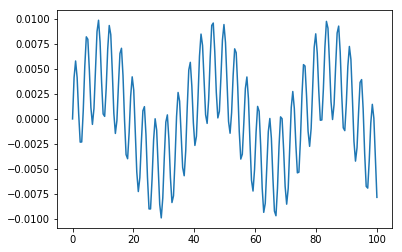

In [4]:
plt.plot(X,U)

Se inicializan las matrices del problema:

In [5]:
A = np.diagflat([-sigma/2 for i in range(N-1)], 1) +\
    np.diagflat([1 + sigma]+[1 + 2*sigma for i in range(N-2)] + [1 + sigma])+\
    np.diagflat([-sigma/2 for i in range(N-1)], -1)

B = np.diagflat([sigma/2 for i in range(N-1)], 1) +\
    np.diagflat([1 - sigma]+[(1 - sigma) for i in range(N-2)] + [1 - sigma])+\
    np.diagflat([sigma/2 for i in range(N-1)], -1)

Finalmente, se resuelve usando el módulo de `linalg`:

In [6]:
U_sol = []
U_sol.append(U)

## Tolerancia evolucion en m(x,t)
tol = 10**(-2)

## Primer paso
U_n = np.linalg.solve(A, np.matmul(B,U) + m(U))

## Condicones de Dirchlet
U_n[0] = 0
U_n[-1] = 0

## Actualizamos
U = U_n

#Guardamos para poder graficar
U_sol.append(U)
count = 0
for i in range(0, 5000):
    U_n = np.linalg.solve(A, np.matmul(B,U)+ m(U))
    
    #Condición de evolucion para m
    if abs(U[-1] - U_n[-1])< tol and abs(U_n[0] - U[0])< tol:
        if count > 2000:
            print("Condition met")
            ## Condicones de Dirchlet
            U_n[0] = 0
            U_n[-1] = 0
            
            ## Actualizamos
            U = U_n
            #Guardamos para poder grafica
            U_sol.append(U)
            break
        count += 1
        
        
    ## Condicones de Dirchlet
    U_n[0] = 0
    U_n[-1] = 0
    
    ## Actualizamos
    U = U_n
        
    #Guardamos para poder graficar
    U_sol.append(U)

Condition met


Después de resolver, se gráfica la solución mediante un `heatmap`:

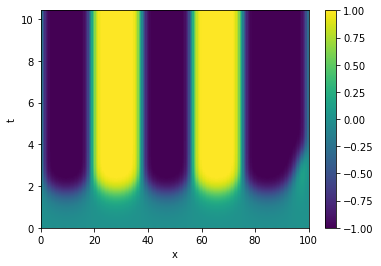

In [7]:
U_sol = np.array(U_sol)* -1* 2.8

fig, ax = plt.subplots()
plt.xlabel('x') 
plt.ylabel('t')

## Se grafica y ajusta
t_grid = np.array([n*dt/8.3 for n in range(len(U_sol))])

heatmap = ax.pcolor(X, t_grid, U_sol, vmin=-1, vmax=1)
colorbar = plt.colorbar(heatmap)

Para finalizar se pide explorar el efecto de utilizar distintos pasos de integración $\Delta x$ y $\Delta t$.

Para llevar esto a cabo, encapsulamos lo anterior en una función:

In [8]:
def Crank_Nicolson_diffusion(delta_x, delta_t):
    # Preparación
    
    ## Constantes
    L = 100
    N = 200
    gamma = 1.0
    mu = 2.315


    ## Discretizacion

    dt = delta_t 
    dx = delta_x
    N = int(L/dx) 
    X = np.linspace(0, 100, num=int(N))
    
    sigma = (gamma*dt)/(2*dx**2)

    ## fuente (de manera vectorial)
    def m(u):
        i=(u - u**3)
        return np.multiply(dt, np.multiply(mu,i))
    
    ## Condicion Inicial
    U = np.array([0.005 * math.sin((315/10)*x) + 0.005*math.sin(315*x) for x in range(0,N)])
    
    
    ## Matrices del problema
    A = np.diagflat([-sigma/2 for i in range(N-1)], 1) +\
        np.diagflat([1 + sigma]+[1 + 2*sigma for i in range(N-2)] + [1 + sigma])+\
        np.diagflat([-sigma/2 for i in range(N-1)], -1)

    B = np.diagflat([sigma/2 for i in range(N-1)], 1) +\
        np.diagflat([1 - sigma]+[(1 - sigma) for i in range(N-2)] + [1 - sigma])+\
        np.diagflat([sigma/2 for i in range(N-1)], -1)
    
    # Resolucion
    ## Inicialización
    U_sol = []
    U_sol.append(U)

    ## Tolerancia evolucion en m(x,t)
    tol = 10**(-7)

    # Primer paso
    U_n = np.linalg.solve(A, np.matmul(B,U) + m(U))

    ## Condicones de Dirchlet
    U_n[0] = 0
    U_n[-1] = 0

    ## Actualizamos
    U = U_n

    ##Guardamos para poder graficar
    U_sol.append(U)
    
    count = 0
    for i in range(0, 2500):
        U_n = np.linalg.solve(A, np.matmul(B,U)+ m(U))
        
        #Condición de evolucion para m
        if abs(U[-1] - U_n[-1])< tol and abs(U_n[0] - U[0])< tol:
            if count > 2000:
                print("Condition met")
                ## Condicones de Dirchlet
                U_n[0] = 0
                U_n[-1] = 0
            
                ## Actualizamos
                U = U_n
                #Guardamos para poder grafica
                U_sol.append(U)
                break
            count += 1
        ## Condicones de Dirchlet
        U_n[0] = 0
        U_n[-1] = 0
    
        ## Actualizamos
        U = U_n
        
        ##Guardamos para poder graficar
        U_sol.append(U)
    
    # Se grafica y ajusta
    U_sol = np.array(U_sol)

    fig, ax = plt.subplots(sharex=True)
    plt.xlabel('x') 
    plt.ylabel('t')
    
    t_grid = np.array([n*dt/10.5 for n in range(len(U_sol))])
    
    heatmap = ax.pcolor(X, t_grid, U_sol * -1 * 2.8, vmin=-1, vmax=1)
    colorbar = plt.colorbar(heatmap)
    plt.savefig('foo'+ str(dx)+ '_'+ str(dt) +'.png')
    plt.clf()  
    plt.close()

Condition met
Condition met
Condition met


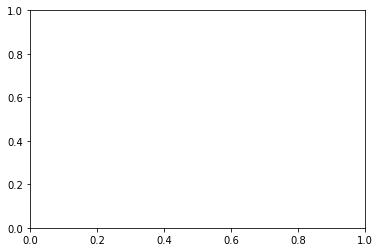

In [10]:
#Nuevos valores de dt y dx
deltas_X = [1, 0.5, 0.1]
deltas_T = [1, 0.5, 0.1]

fig, ax = plt.subplots(sharex=True)
for new_dx in deltas_X:
    for new_dt in deltas_T:
        Crank_Nicolson_diffusion(new_dx ,new_dt)


Se muestran algunos resultados:

Se utiliza dx = 1 y dt = 1


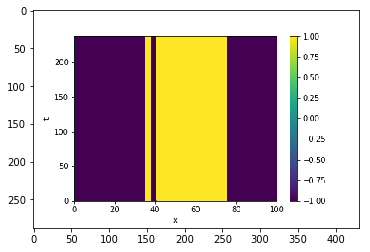


Se utiliza dx = 0.5 y dt = 0.1


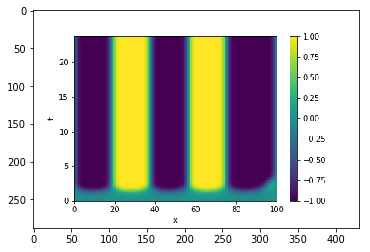


Se utiliza dx = 0.5 y dt = 0.5


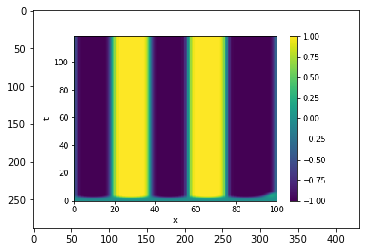


Se utiliza dx = 0.1 y dt = 0.1


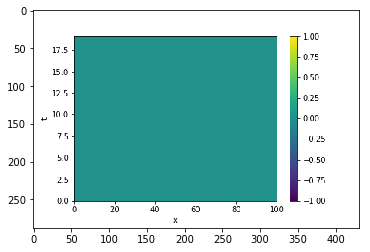

In [11]:
import matplotlib.image as mpimg

print("Se utiliza dx = 1 y dt = 1")
img=mpimg.imread('foo1_1.png')
imgplot = plt.imshow(img)
plt.show()
plt.close()
print()


print("Se utiliza dx = 0.5 y dt = 0.1")
img=mpimg.imread('foo0.5_0.1.png')
imgplot = plt.imshow(img)
plt.show()
plt.close()
print()

print("Se utiliza dx = 0.5 y dt = 0.5")
img=mpimg.imread('foo0.5_0.5.png')
imgplot = plt.imshow(img)
plt.show()
plt.close()
print()

print("Se utiliza dx = 0.1 y dt = 0.1")
img=mpimg.imread('foo0.1_0.1.png')
imgplot = plt.imshow(img)
plt.show()
plt.close()
print()

Se puede observar que los valores de $dx$ y $dt$ afectan en la convergencia de la solución.

Así, se tiene lo siguiente:
1. Cuando se tienen valores de $dx$ o $dt$ bajos, el método no converge.
    * Para $dx$, esto genera un cambio demasiado brusco en el valor de $\sigma$. 
    * De la misma manera, a menor $dx$, se tienen más puntos a calcular. Esto produce que la solución sea "demasiado específica". 
    
    A cierto punto, el método deja de ser estable ($dx < 0.5$).


2. De la misma manera, al disminuir $dt$, el método no alcanza converger.